In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2023/train_data.csv
/kaggle/input/widsdatathon2023/test_data.csv
/kaggle/input/widsdatathon2023/sample_solution.csv


data loading

In [2]:
train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')
test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv')

# Display the first few rows of the datasets
print(train_df.head())
print(test_df.head())

   index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333    9/1/14                              237.00   
1      1  0.0  0.833333    9/2/14                              228.90   
2      2  0.0  0.833333    9/3/14                              220.69   
3      3  0.0  0.833333    9/4/14                              225.28   
4      4  0.0  0.833333    9/5/14                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73       

cheking missing values

In [3]:
# Check for missing values in the dataset
print(train_df.isnull().sum())
print(test_df.isnull().sum())

index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 246, dtype: int64
index                                 0
lat                                   0
lon                                   0
startdate                             0
contest-pevpr-sfc-gauss-14d__pevpr    0
                                     ..
wind-vwnd-925-2010-16                 0
wind-vwnd-925-2010-17                 0
wind-vwnd-925-2010-18                 0
wind-vwnd-925-2010-19                 0
wind-vwnd-925-2010-20                 0
Length: 245, dtype: int64


checking and updating the target variable

In [4]:
# Check the column names in the train dataset
print(train_df.columns)

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)


In [5]:
# Choose the target column (update with your chosen column)
target_column = 'nmme0-tmp2m-34w__cancm30'  # Update this with your actual target column name

# Split the dataset into features (X) and target (y)
X_train = train_df.drop(columns=[target_column, 'index', 'startdate'])  # Drop target, index, and non-relevant columns
y_train = train_df[target_column]  # Define the target variable for training

X_test = test_df.drop(columns=[target_column, 'index', 'startdate'])  # Drop target, index, and non-relevant columns
y_test = test_df[target_column]  # Define the target variable for testing

# Check the shapes to ensure everything is set correctly
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (375734, 243)
y_train shape: (375734,)
X_test shape: (31354, 242)
y_test shape: (31354,)


data examination

In [12]:
df_train = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv')


In [13]:
print("Columns in df_train:")
print(df_train.columns)

print("\nData Types:")
print(df_train.dtypes)

print("\nSummary Statistics for Numeric Features:")
print(df_train.describe())

Columns in df_train:
Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=246)

Data Types:
index                                   int64
lat                                   float64
lon                                   float64
startdate                              object
contest-pevpr-sfc-gauss-14d__pevpr    float64
                                       ...   
wind-vwnd-925-2010-16                 float64
wind-vwnd-925-2010-17                 float64
wind-vwnd-925-2010-18       


Correlation Matrix (first 10 rows and columns):
                                       index       lat       lon  \
index                               1.000000  0.995633 -0.244666   
lat                                 0.995633  1.000000 -0.306329   
lon                                -0.244666 -0.306329  1.000000   
contest-pevpr-sfc-gauss-14d__pevpr -0.288070 -0.274746 -0.049337   
nmme0-tmp2m-34w__cancm30           -0.376644 -0.383298  0.163887   
nmme0-tmp2m-34w__cancm40           -0.359128 -0.369944  0.215240   
nmme0-tmp2m-34w__ccsm30            -0.395105 -0.401132  0.157882   
nmme0-tmp2m-34w__ccsm40            -0.365150 -0.371702  0.152577   
nmme0-tmp2m-34w__cfsv20            -0.395458 -0.399335  0.113892   
nmme0-tmp2m-34w__gfdlflora0        -0.366948 -0.373966  0.158073   

                                    contest-pevpr-sfc-gauss-14d__pevpr  \
index                                                        -0.288070   
lat                                                   

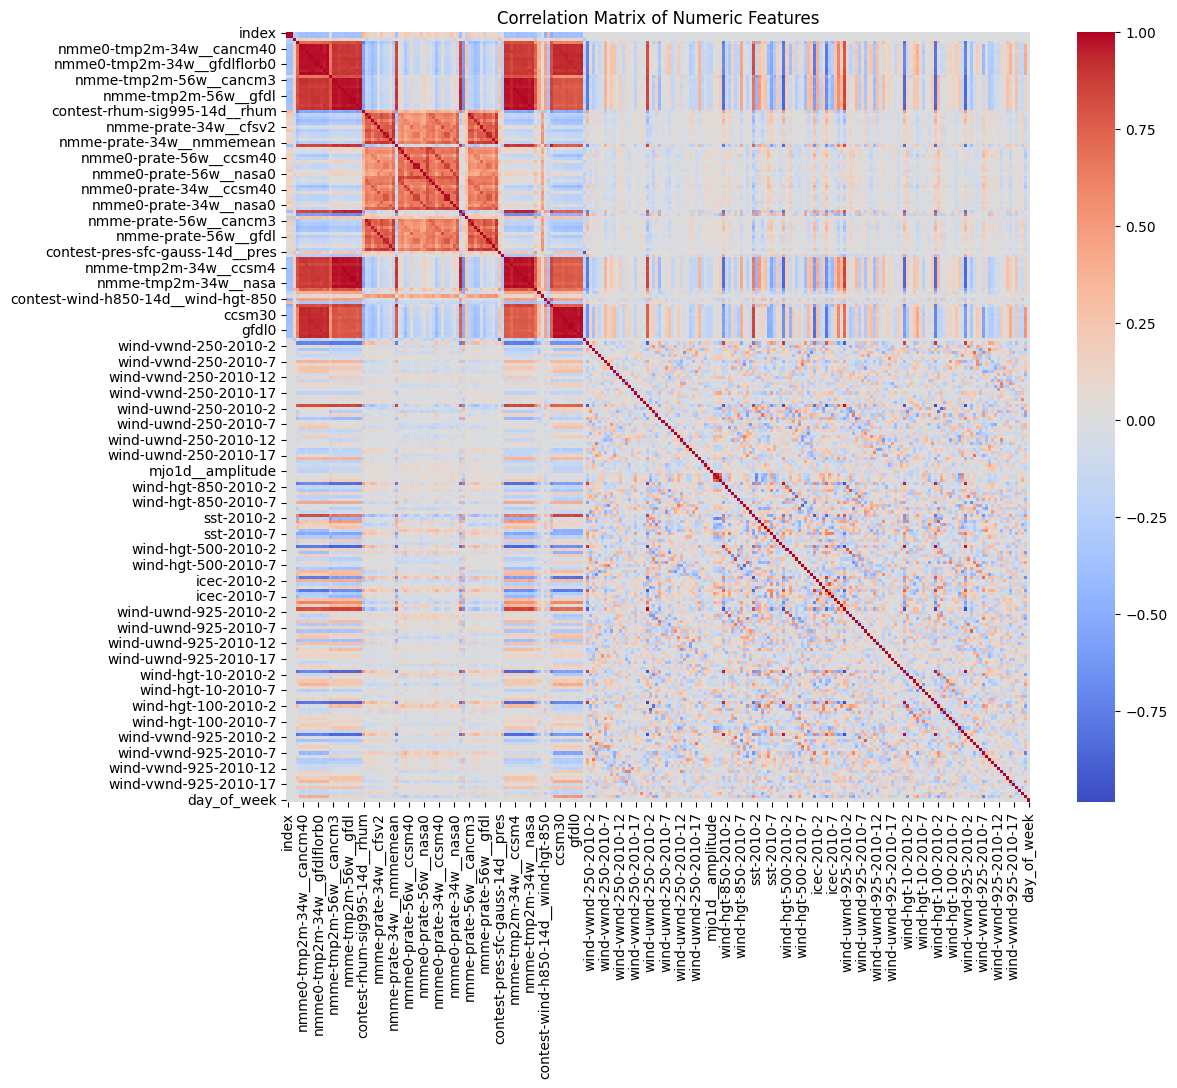


Correlation of all features with contest-tmp2m-14d__tmp2m:
contest-tmp2m-14d__tmp2m    1.000000
nmme-tmp2m-56w__cfsv2       0.954668
nmme-tmp2m-34w__cfsv2       0.954483
nmme-tmp2m-56w__nmmemean    0.950865
nmme-tmp2m-34w__nmmemean    0.950187
                              ...   
wind-hgt-850-2010-1        -0.779923
wind-hgt-100-2010-1        -0.802240
wind-hgt-500-2010-1        -0.806078
wind-vwnd-925-2010-1       -0.807371
wind-hgt-10-2010-1         -0.815701
Name: contest-tmp2m-14d__tmp2m, Length: 246, dtype: float64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# ----- Convert 'startdate' to datetime and extract features (if needed) -----
df_train['startdate'] = pd.to_datetime(df_train['startdate'], format='%m/%d/%y')
df_train['month'] = df_train['startdate'].dt.month
df_train['day_of_week'] = df_train['startdate'].dt.dayofweek

# ----- Correlation Analysis -----
# Select only numeric columns (this includes the newly created 'month' and 'day_of_week')
numeric_cols = df_train.select_dtypes(include=['float32', 'float64', 'int32', 'int64'])
corr_matrix = numeric_cols.corr()

# Print a snippet of the correlation matrix
print("\nCorrelation Matrix (first 10 rows and columns):")
print(corr_matrix.iloc[:10, :10])

# ----- Visualize the Correlation Matrix with a Heatmap -----
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# ----- Optional: Correlation with Target Variable -----
# Assuming your target variable is named 'contest-tmp2m-14d__tmp2m'
target = 'contest-tmp2m-14d__tmp2m'
if target in df_train.columns:
    target_corr = corr_matrix[target].sort_values(ascending=False)
    print(f"\nCorrelation of all features with {target}:")
    print(target_corr)
else:
    print(f"\nTarget column '{target}' not found in df_train. Please check the column name.")


In [16]:
# Convert 'startdate' to datetime (assumes format 'm/d/yy')
df_train['startdate'] = pd.to_datetime(df_train['startdate'], format='%m/%d/%y')

# Extract month and day of week from 'startdate'
df_train['month'] = df_train['startdate'].dt.month
df_train['day_of_week'] = df_train['startdate'].dt.dayofweek

# Verify the changes
print(df_train[['startdate', 'month', 'day_of_week']].head())


   startdate  month  day_of_week
0 2014-09-01      9            0
1 2014-09-02      9            1
2 2014-09-03      9            2
3 2014-09-04      9            3
4 2014-09-05      9            4


histogram

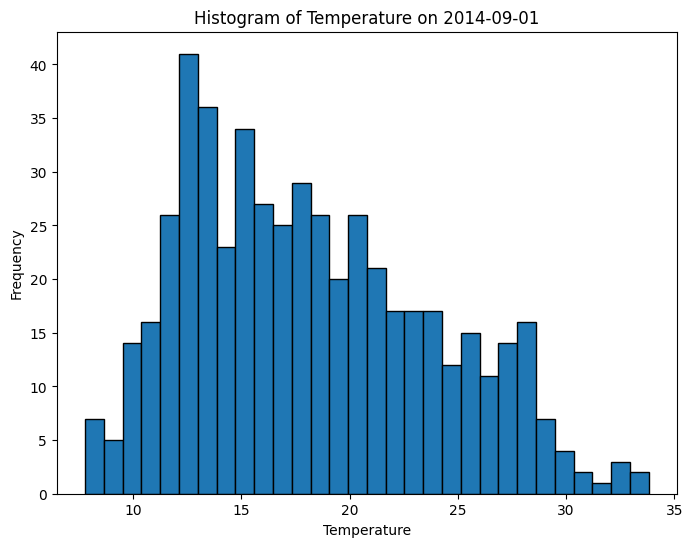

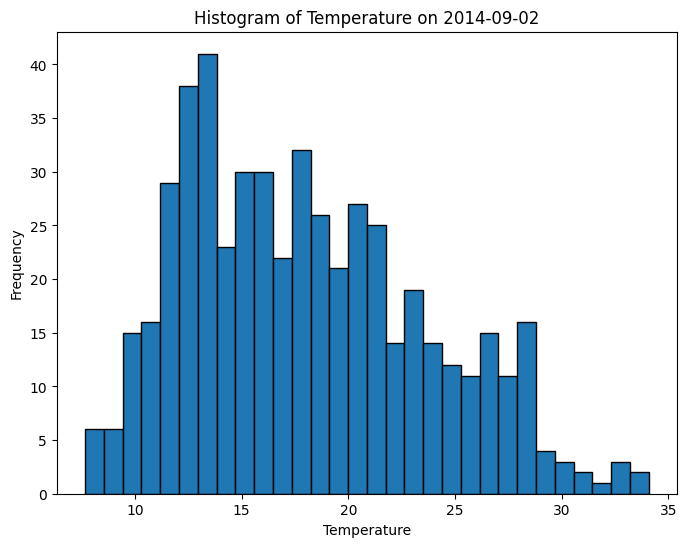

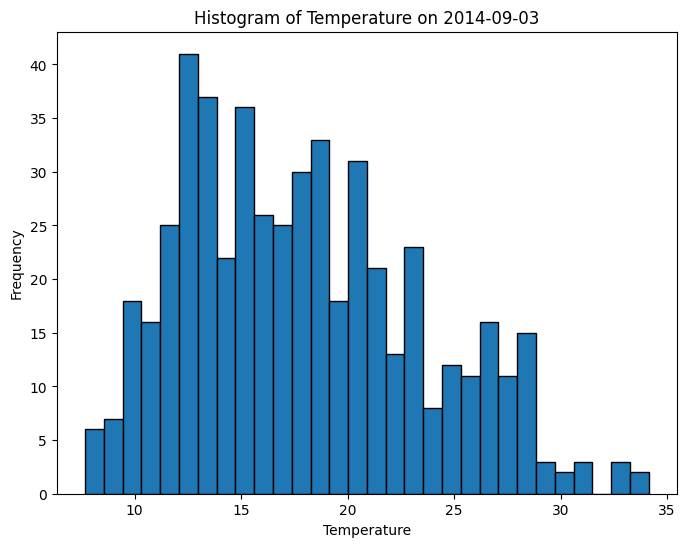

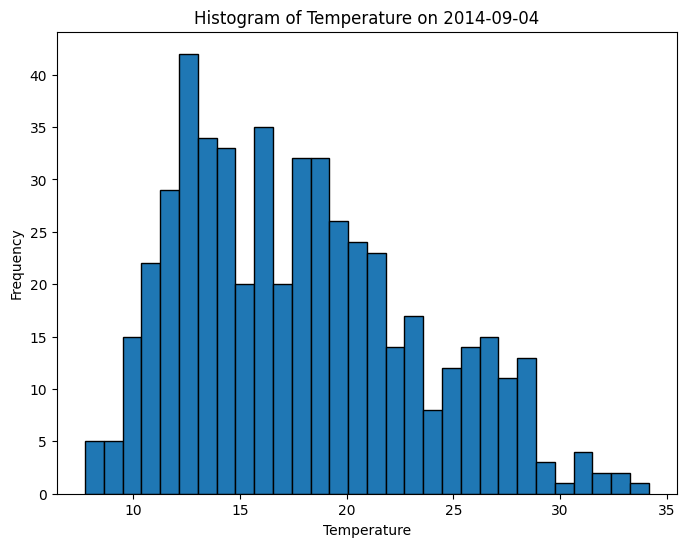

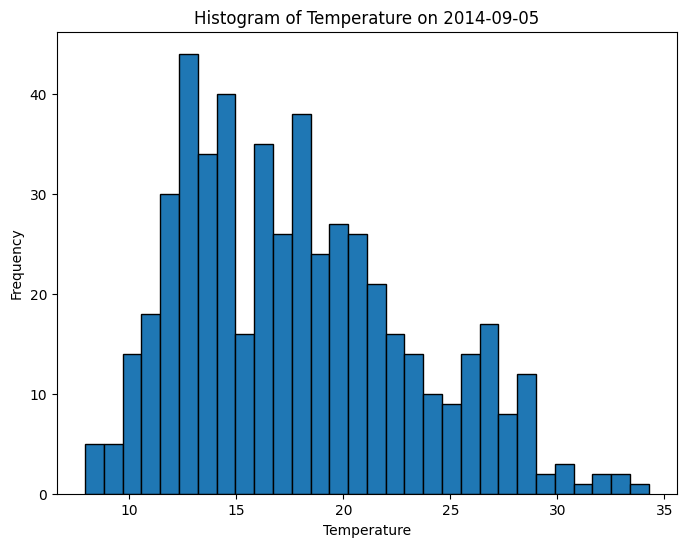

In [20]:
import matplotlib.pyplot as plt

# Get unique days (as Timestamp objects) and sort them
unique_days = sorted(df_train['startdate'].unique())

# For example, plot histograms for the first 5 unique days
for day in unique_days[:5]:
    day_data = df_train[df_train['startdate'] == day]
    
    plt.figure(figsize=(8,6))
    plt.hist(day_data['contest-tmp2m-14d__tmp2m'], bins=30, edgecolor='k')
    plt.title(f'Histogram of Temperature on {day.date()}')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()


feature engineering

In [26]:
# Convert the 'climateregions__climateregion' column to category in both training and validation sets
for df in [X_train, X_val]:
    if 'climateregions__climateregion' in df.columns:
        df['climateregions__climateregion'] = df['climateregions__climateregion'].astype('category')


preparing data

In [22]:
# Define the target variable
target = 'contest-tmp2m-14d__tmp2m'

# Create target vector y
y = df_train[target]

# Create feature matrix X by dropping non-feature columns:
# - 'index' (if not needed)
# - 'startdate' (as we extracted useful parts already)
# - the target variable itself
X = df_train.drop(columns=['index', 'startdate', target])


In [ ]:
splitting data intgo training and validation

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (300587, 245)
y_train shape: (300587,)
X_val shape: (75147, 245)
y_val shape: (75147,)


model training

In [27]:
# Option 1: If converting to category
for df in [X_train, X_val]:
    if 'climateregions__climateregion' in df.columns:
        df['climateregions__climateregion'] = df['climateregions__climateregion'].astype('category')

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    enable_categorical=True
)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

model evaluation

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Model Performance on Validation Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


Model Performance on Validation Set:
RMSE: 0.8318
MAE:  0.6467
R²:   0.9929


visualization of actual vs predicted values


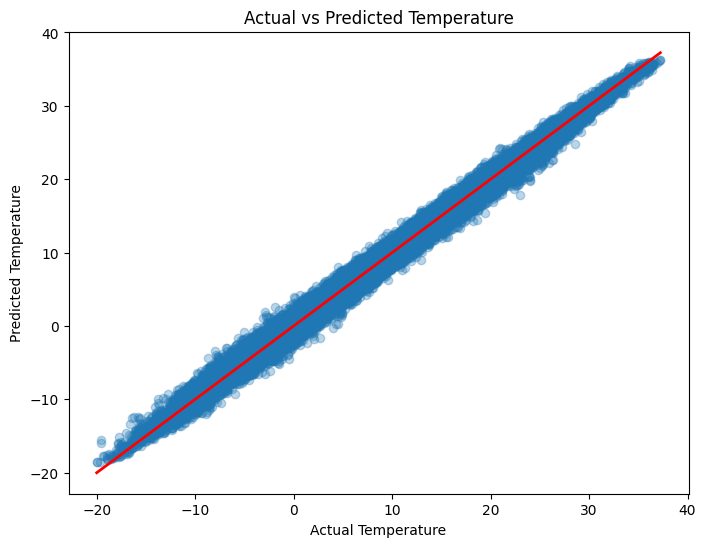

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
# Draw a line for perfect predictions
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color="red", lw=2)
plt.show()


feature importance

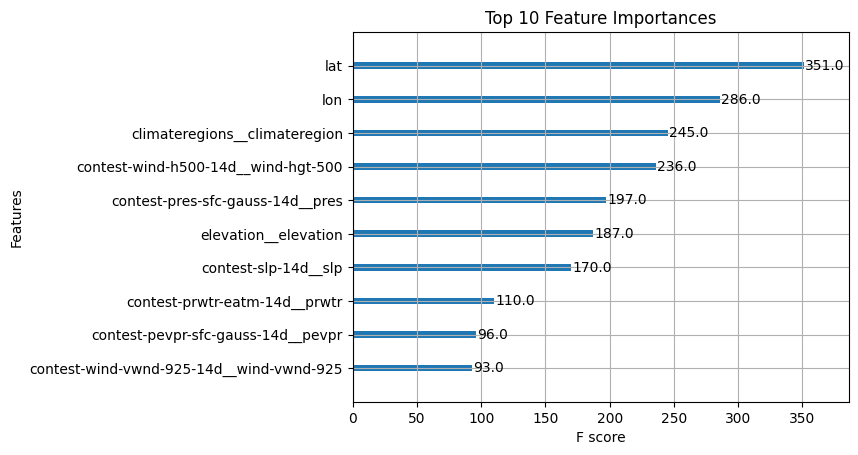

In [30]:
import xgboost as xgb

# Plot the top 10 most important features
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


XGboost built in featur importance

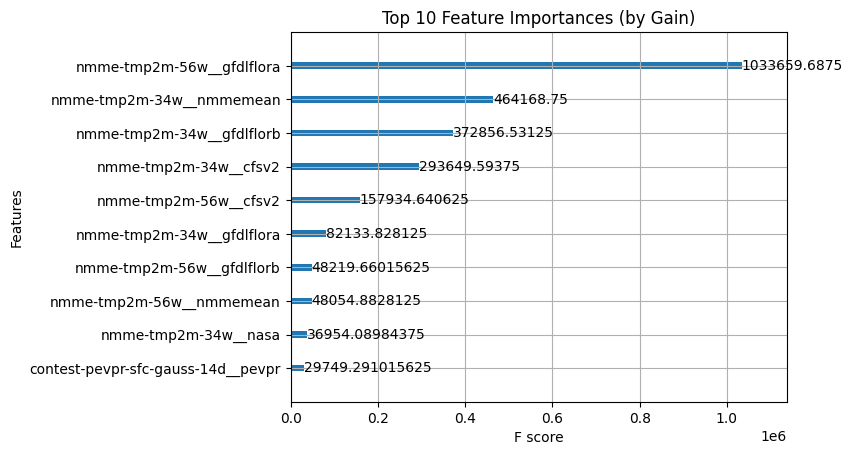

In [31]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot the top 10 most important features by gain
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (by Gain)")
plt.show()


SHAP Feature Importance Analysis

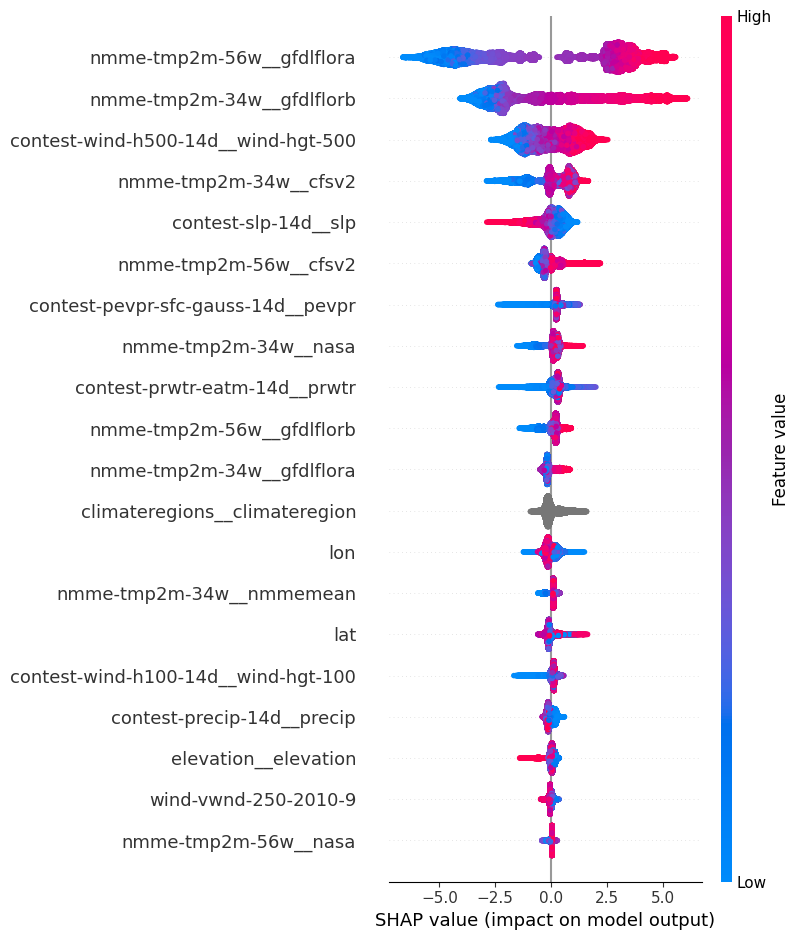

In [32]:
import shap

# Create a TreeExplainer for your model
explainer = shap.TreeExplainer(model)
# Calculate SHAP values for the validation set
shap_values = explainer.shap_values(X_val)

# SHAP summary plot for a global view of feature importance
shap.summary_plot(shap_values, X_val)


computational efficiency

training time

In [ ]:
import time
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# --- Example: Data should already be loaded and preprocessed ---
# For example:
# df_train = pd.read_parquet('train_data_reduced.parquet')
# X_train, X_val, y_train, y_val are already defined from your data splitting process.

# If not already defined, uncomment and adjust the following lines:
# df_train = pd.read_parquet('train_data_reduced.parquet')
# target = 'contest-tmp2m-14d__tmp2m'
# y = df_train[target]
# X = df_train.drop(columns=['index', 'startdate', target])
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Measure Training Time ---
start_time = time.time()
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    enable_categorical=True
)
model.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.4f} seconds")

# --- Measure Prediction Time ---
start_time = time.time()
y_pred = model.predict(X_val)
end_time = time.time()
prediction_time = end_time - start_time
print(f"Prediction time: {prediction_time:.4f} seconds")

# --- Evaluate Model Performance ---
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("Model Performance on Validation Set:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# --- Memory Usage of Training Data ---
memory_usage_mb = df_train.memory_usage(deep=True).sum() / 1024**2
print(f"Training data memory usage: {memory_usage_mb:.2f} MB")

# --- Optional: Using memory_profiler (if installed) ---
# Uncomment the following if you have memory_profiler installed.
# You can install it via: pip install memory_profiler
#
# %load_ext memory_profiler
# %memit model.fit(X_train, y_train)
